<a href="https://colab.research.google.com/github/benjaminutter/IDS/blob/Project6/Project6P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# url of csv
data_url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv"

# put into df
df = pd.read_csv(data_url)

Creating classification models, recording classification models and plotting the results:

Text Representation of the Decision Tree:
 |--- marital-status_Married-civ-spouse <= 0.50
|   |--- capital-gain <= 7073.50
|   |   |--- capital-loss <= 2391.50
|   |   |   |--- age <= 33.50
|   |   |   |   |--- truncated branch of depth 19
|   |   |   |--- age >  33.50
|   |   |   |   |--- truncated branch of depth 27
|   |   |--- capital-loss >  2391.50
|   |   |   |--- capital-loss <= 3726.50
|   |   |   |   |--- class: >50K
|   |   |   |--- capital-loss >  3726.50
|   |   |   |   |--- class: <=50K
|   |--- capital-gain >  7073.50
|   |   |--- age <= 20.50
|   |   |   |--- class: <=50K
|   |   |--- age >  20.50
|   |   |   |--- capital-gain <= 7669.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- capital-gain >  7669.50
|   |   |   |   |--- truncated branch of depth 4
|--- marital-status_Married-civ-spouse >  0.50
|   |--- capital-gain <= 5095.50
|   |   |--- occupation_Prof-specialty <= 0.50
|   |   |   |--- occupation_Exec-managerial <= 0.50
|   |   |   |   |---

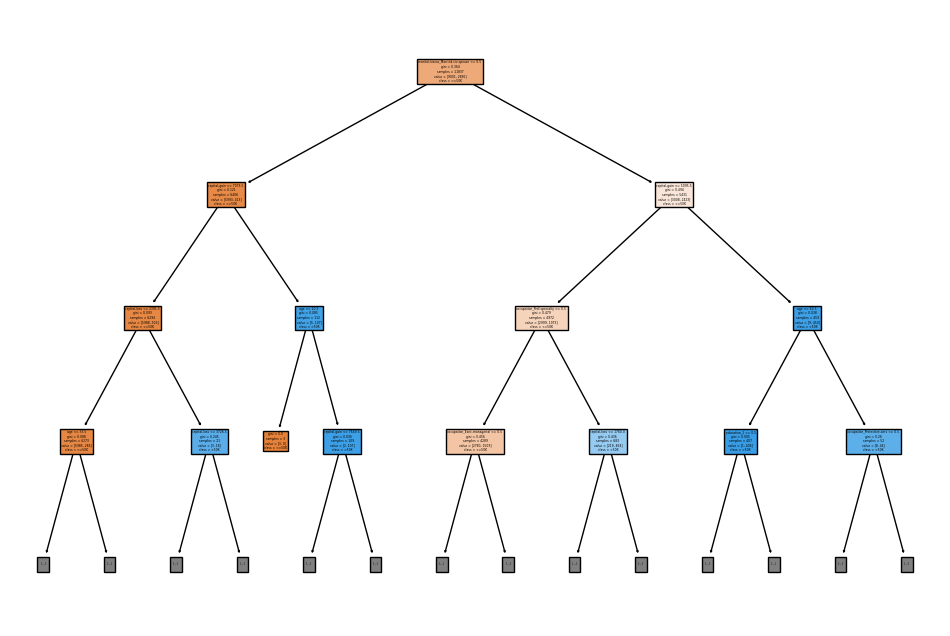

Text Representation of the Decision Tree:
 |--- marital-status_Married-civ-spouse <= 0.50
|   |--- capital-gain <= 7073.50
|   |   |--- age <= 33.50
|   |   |   |--- age <= 23.50
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- age >  23.50
|   |   |   |   |--- truncated branch of depth 15
|   |   |--- age >  33.50
|   |   |   |--- occupation_Prof-specialty <= 0.50
|   |   |   |   |--- truncated branch of depth 34
|   |   |   |--- occupation_Prof-specialty >  0.50
|   |   |   |   |--- truncated branch of depth 27
|   |--- capital-gain >  7073.50
|   |   |--- age <= 20.50
|   |   |   |--- class: <=50K
|   |   |--- age >  20.50
|   |   |   |--- marital-status_Divorced <= 0.50
|   |   |   |   |--- class: >50K
|   |   |   |--- marital-status_Divorced >  0.50
|   |   |   |   |--- truncated branch of depth 4
|--- marital-status_Married-civ-spouse >  0.50
|   |--- capital-gain <= 5095.50
|   |   |--- capital-loss <= 1782.50
|   |   |   |--- occupation_Prof-specialty <= 0.50
|

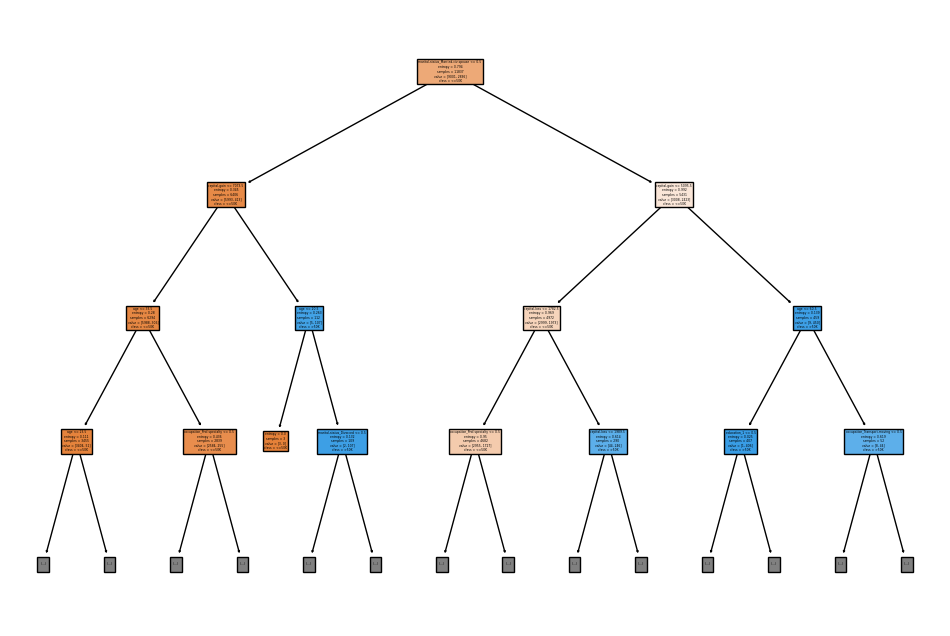

In [8]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# finding target variables
X = df.drop('income', axis=1)
y = df['income']

# categorical columns to numerical
X = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status', 'occupation', 'sex'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating decision tree classification model
def makeDTModel(criterion, X_train, y_train):
    classifier = DecisionTreeClassifier(criterion=criterion)
    classifier.fit(X_train, y_train)
    return classifier

# function to display tree
def displayTree(classifier, X, max_depth_display=None):
    # text representation
    text_representation = export_text(classifier, feature_names=X.columns.tolist(), max_depth=max_depth_display)
    print("Text Representation of the Decision Tree:\n", text_representation)

    # graphic representation
    plt.figure(figsize=(12, 8))
    plot_tree(classifier, feature_names=X.columns, class_names=classifier.classes_, filled=True, max_depth=max_depth_display)
    plt.show()

# fuction to display confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
    # Make predictions
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # display confusion matrix
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix (Training)")

    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix (Testing)")

    plt.show()

# create and display plots of models
def compareModels(model1, model2):
    # Compare models based on accuracy
    accuracy_model1 = accuracy_score(y_test, model1.predict(X_test))
    accuracy_model2 = accuracy_score(y_test, model2.predict(X_test))

    # plot comparison
    plt.figure(figsize=(10, 6))
    plt.bar(['Model 1', 'Model 2'], [accuracy_model1, accuracy_model2], color=['blue', 'green'])
    plt.title('Model Comparison')
    plt.ylabel('Accuracy')
    plt.show()

# usage
cart_classifier = makeDTModel("gini", X_train, y_train)
c5_classifier = makeDTModel("entropy", X_train, y_train)

# display trees with a limited depth
displayTree(cart_classifier, X, max_depth_display=3)
displayTree(c5_classifier, X, max_depth_display=3)



Analyzing the effect of the parameters max_depth and max_leaf_nodes on classification accuracy. Plotting the obtained accuracy values for various choices of max_depth and max_leaf_nodes:

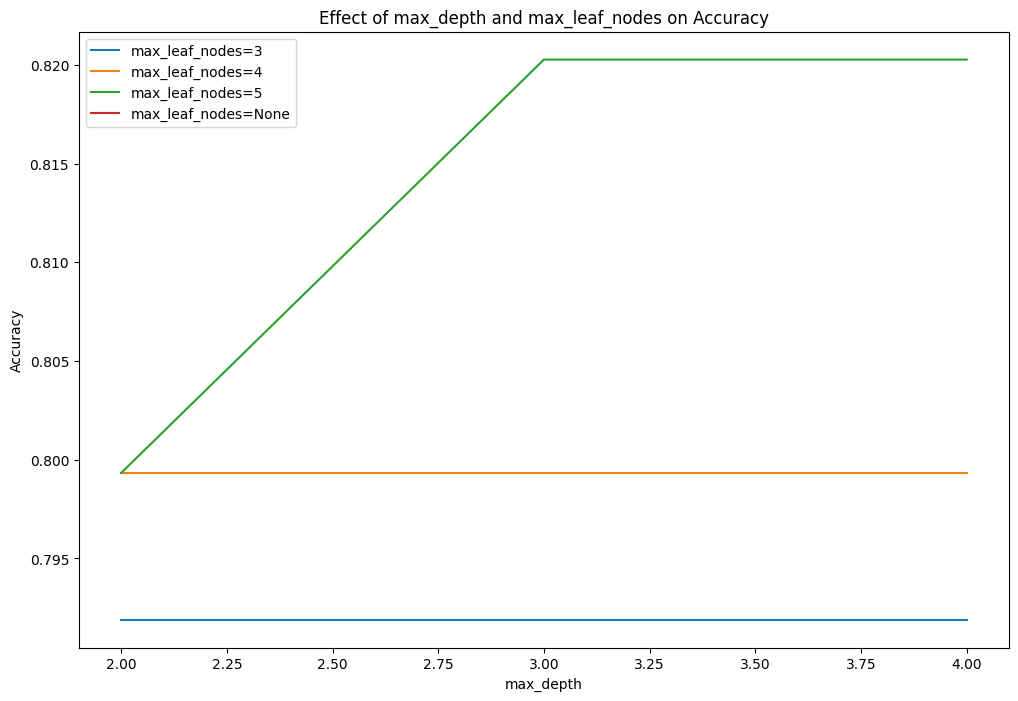

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# finding target variables
X = df.drop('income', axis=1)
y = df['income']

# converting categorical columns to numerical
X = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status', 'occupation', 'sex'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# function to find accuracy with given max_depth and max_leaf_nodes
def evaluate_accuracy(max_depth, max_leaf_nodes, X_train, y_train, X_test, y_test):
    classifier = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# test max_depth and max_leaf_nodes
max_depth_values = [2, 3, 4, None]
max_leaf_nodes_values = [3, 4, 5, None]

# evaluate accuracy for different combinations
accuracy_results = []

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        accuracy = evaluate_accuracy(max_depth, max_leaf_nodes, X_train, y_train, X_test, y_test)
        accuracy_results.append({
            'max_depth': max_depth,
            'max_leaf_nodes': max_leaf_nodes,
            'accuracy': accuracy
        })

# put results into a DataFrame
results_df = pd.DataFrame(accuracy_results)

# plotting
plt.figure(figsize=(12, 8))

for max_leaf_nodes in max_leaf_nodes_values:
    subset = results_df[results_df['max_leaf_nodes'] == max_leaf_nodes]
    plt.plot(subset['max_depth'], subset['accuracy'], label=f'max_leaf_nodes={max_leaf_nodes}')

plt.title('Effect of max_depth and max_leaf_nodes on Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Summary of my findings:

The Decision Tree helps predict income based on certain characteristics. It checks if a person is married and considers factors like capital gain, capital loss, age, occupation, and education. However, the tree is quite detailed, which could make it too specific to our training data and less helpful for new data. It might be good to make the tree simpler and check if it still works well with new information. The graph depicting accuracy based on the max leaf nodes also does help show us that the more leaf nodes, the higher the accuracy.

